In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [109]:
df = pd.read_csv('real_estate_investment_suitability.csv')

In [110]:
df.tail()

,Property ID,Location,Price (₦),Rental Yield (%),Security Rating,Infrastructure,Suitability Score
95,PID3773,Ibadan,24587040,11.62,High,Good,High
96,PID3293,Lagos Island,13491573,3.16,High,Poor,Low
97,PID9954,Kano,27442197,11.41,Medium,Good,Medium
98,PID9000,Lagos Island,63341261,3.42,Low,Good,High
99,PID4015,Kano,42038975,5.12,High,Good,Medium


In [111]:
df['Infrastructure'].unique()

array(['Poor', 'Fair', 'Good'], dtype=object)

In [112]:
df.isnull().sum()

Property ID          0
Location             0
Price (₦)            0
Rental Yield (%)     0
Security Rating      0
Infrastructure       0
Suitability Score    0
dtype: int64

In [113]:
df.duplicated().sum()

0

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property ID        100 non-null    object 
 1   Location           100 non-null    object 
 2   Price (₦)          100 non-null    int64  
 3   Rental Yield (%)   100 non-null    float64
 4   Security Rating    100 non-null    object 
 5   Infrastructure     100 non-null    object 
 6   Suitability Score  100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [115]:
df.describe()

,Price (₦),Rental Yield (%)
count,1.000000e+02,100.000000
mean,4.983689e+07,7.233000
std,2.589344e+07,2.685173
min,5.697290e+06,2.110000
25%,2.570482e+07,5.277500
50%,5.106703e+07,7.150000
75%,7.093225e+07,9.097500
max,9.751769e+07,11.910000


In [116]:
df.shape

(100, 7)

In [117]:
df.drop('Property ID', axis = 1, inplace = True)

In [118]:
df.rename(columns={ 'Price (₦)':'price',  'Rental Yield (%)': 'Rental Yield' }, inplace=True)

<Axes: >

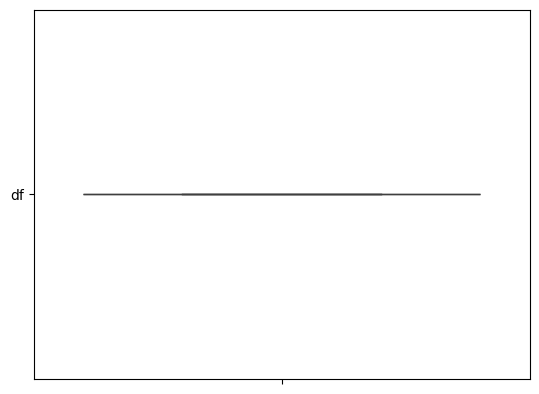

In [119]:
sns.boxplot('df')

In [120]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
 

In [121]:
df.columns

Index(['Location', 'price', 'Rental Yield', 'Security Rating',
       'Infrastructure', 'Suitability Score'],
      dtype='object')

In [122]:
x = df.drop('Suitability Score', axis=1)
y = df['Suitability Score']

In [123]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
y = label.fit_transform(y)

In [124]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [125]:
num_features = ['price', 'Rental Yield']
num_tran = Pipeline([
    ('scaler', MinMaxScaler())
])

In [126]:
cat_features = ['Location', 'Security Rating','Infrastructure']
cat_tran = OneHotEncoder(handle_unknown='ignore')

In [127]:
preprocessor = ColumnTransformer([
    ('num',num_tran, num_features),
    ('cat', cat_tran,cat_features)
])

In [128]:
model_pipeline1 = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,weights='uniform'))
])

In [129]:
#df[df['Property ID'].apply(callable)]

In [130]:
model_pipeline1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['price', 'Rental Yield']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Location',
                                                   'Security Rating',
                                                   'Infrastructure'])])),
                ('model', KNeighborsClassifier(n_jobs=-1))])

In [131]:
y_pred = model_pipeline1.predict(x_test)

In [132]:
import joblib

In [133]:
joblib.dump(model_pipeline1, 'investments_suitability.joblib')

['investments_suitability.joblib']